## CNN classifier for the MNIST dataset
In this notebook, we will write code to build, compile and fit a convolutional neural network (CNN) model to the MNIST dataset of images of handwritten digits.


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



#### The MNIST dataset

In this assignment, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### LOAD THE DATA 

In [2]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

def scale(x):
    return x/255.

def reshape_data(x):
    return x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)

def overview(x,string):
    print(f"Overview {string}")
    print(f"shape: {x.shape} Data type: {type(x)}\n")

### Rescale data ###
scaled_train_images = scale(train_images) 
scaled_test_images  = scale(test_images)

### Reshape data ###
scaled_train_images = reshape_data(scaled_train_images)
scaled_test_images  = reshape_data(scaled_test_images)

### Print Overview ###
overview(scaled_train_images,"Train data set")
overview(scaled_test_images,"Test data set")


Overview Train data set
shape: (60000, 28, 28, 1) Data type: <class 'numpy.ndarray'>

Overview Test data set
shape: (10000, 28, 28, 1) Data type: <class 'numpy.ndarray'>



### Build the convolutional neural network model

In [3]:
def get_model(input_shape):
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3,padding="same",activation="relu", input_shape=(input_shape)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

def compile_model(model):
    model.compile(
             loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
def train_model(model, scaled_train_images, train_labels):
    training = model.fit(
        scaled_train_images,
        train_labels,
        epochs=5,
        verbose = 1,
        callbacks=[tf.keras.callbacks.EarlyStopping()]
         )
    return training 

def evaluate_model(model, scaled_test_images, test_labels):
    return  model.evaluate(scaled_test_images ,test_labels,verbose=2)

### Important ###
scaled_train_images[0].shape # Remeber to define pixelxpixelxchannel 

(28, 28, 1)

In [4]:
model = get_model(scaled_train_images[0].shape)                     # Build model
compile_model(model)                                                # Compile moddel
history = train_model(model, scaled_train_images, train_labels)     # Train model 

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2148 - accuracy: 0.9366
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0725 - accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0510 - accuracy: 0.9838
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0386 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0291 - accuracy: 0.9908


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

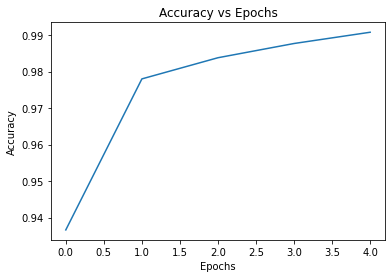

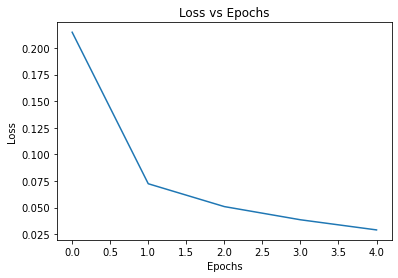

In [5]:
frame = pd.DataFrame(history.history) # create pd DataFrame

### PLOT ACCURACY ###
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

### PLOT LOSS ###
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()


In [6]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 1s - loss: 0.0417 - accuracy: 0.9864
Test loss: 0.041664086282253265
Test accuracy: 0.9864000082015991


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

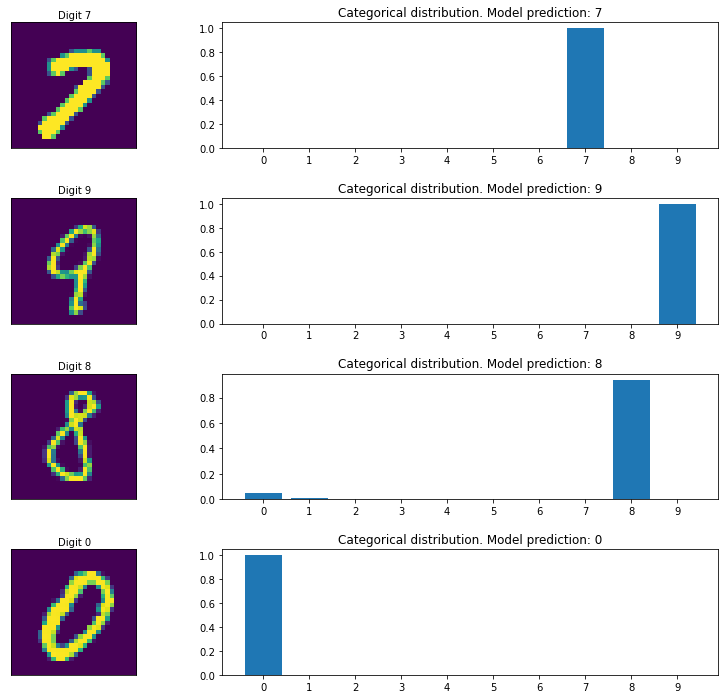

In [7]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()